## Compare the normalized, non normalized and adaptive versions of Tyler estimator

#### Remark about the power factor of the Tyler estimator:
if $u(x) = \frac{\alpha}{x}$ then $\Sigma = \frac{\alpha}{m}\sum_{i=1}^m \frac{x_i x_i^T}{x_i^T \Sigma^{-1}x_i}$. \
Therefore, $ I_n = \frac{\alpha}{m}\sum_{i=1}^m \frac{\Sigma^{-1} x_i x_i^T}{x_i^T \Sigma^{-1}x_i}$ then applying the trace operator, we get : $ n = \frac{\alpha}{m}\sum_{i=1}^m \frac{tr(\Sigma^{-1} x_i x_i^T)}{x_i^T \Sigma^{-1}x_i} = \frac{\alpha}{m}\sum_{i=1}^m \frac{x_i^T \Sigma^{-1} x_i}{x_i^T \Sigma^{-1}x_i} = \alpha$ then we must have $\alpha = n$.

#### Question:
if $\Sigma = \frac{1}{m} \sum_{i=1}^m u(x_i^T \Sigma^{-1} x_i)\ x_i x_i^T $, with $u: x\mapsto \frac{n}{x}$
$$lim_{m + \infty} \frac{1}{m}\sum_{i=1}^m v(x_i^T \Sigma^{-1} x_i) = \log(det(\Sigma))?$$
*Works numerically? possible proof? \
*works with other estimators? \
*intuition : mle?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from SSVEP1 import SsvepLoading,TrialsBuilding,Classify
from estimation import Covariances, huber_param_second_method, huber_param_first_method
from pyriemann.estimation import Covariances as COV

In [2]:
#1. Load data

data_path = 'ssvep_exo/'
subj_list,records = SsvepLoading(data_path)

In [3]:
records

{0: ['subject01_run1', 'subject01_run2'],
 1: ['subject02_run1', 'subject02_run2'],
 2: ['subject03_run1', 'subject03_run2'],
 3: ['subject04_run1', 'subject04_run2'],
 4: ['subject05_run1', 'subject05_run2'],
 5: ['subject06_run1', 'subject06_run2'],
 6: ['subject07_run1', 'subject07_run2', 'subject07_run3'],
 7: ['subject08_run1', 'subject08_run2'],
 8: ['subject09_run1', 'subject09_run2'],
 9: ['subject10_run1', 'subject10_run2', 'subject10_run3', 'subject10_run4'],
 10: ['subject11_run1', 'subject11_run2'],
 11: ['subject12_run1',
  'subject12_run2',
  'subject12_run3',
  'subject12_run4',
  'subject12_run5']}

In [5]:
def fill_dict(results,subject,tmin,tmax,freq_band,train_acc,test_acc,nb_trains,estimator):
    results['subject'].append(subject)
    results['tmin'].append(tmin)
    results['tmax'].append(tmax)
    results['freq_band'].append(freq_band)
    results['mean train score'].append(np.mean(train_acc))
    results['mean test score'].append(np.mean(test_acc))
    results['nb all sessions'].append(len(records[subject]))
    results['nb sessions for train'].append(nb_trains)
    results['estimator'].append(estimator)
    return results


#### 1-Impact of the offset

In [6]:
results =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
with_shuffle = False
delta_t = 3
tmins = [0+0.5*i for i in range(5)]# from 0 to 2


for subject in range(len(subj_list)):
    nb_trains = len(records[subject])-1
    print("--------------",subj_list[subject],"--------------")
    for tmin in tmins:
        
        tmax = tmin + delta_t
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="tyler non normalized non adaptive")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc1,test_acc1 = classif1.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"tyler non normalized non adaptive")
        
        COVS2 = Covariances(estimator="tyler normalized non adaptive")
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"student5")
        
        COVS3 = Covariances(estimator="tyler adaptive")
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler adaptive")
        

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 

Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 

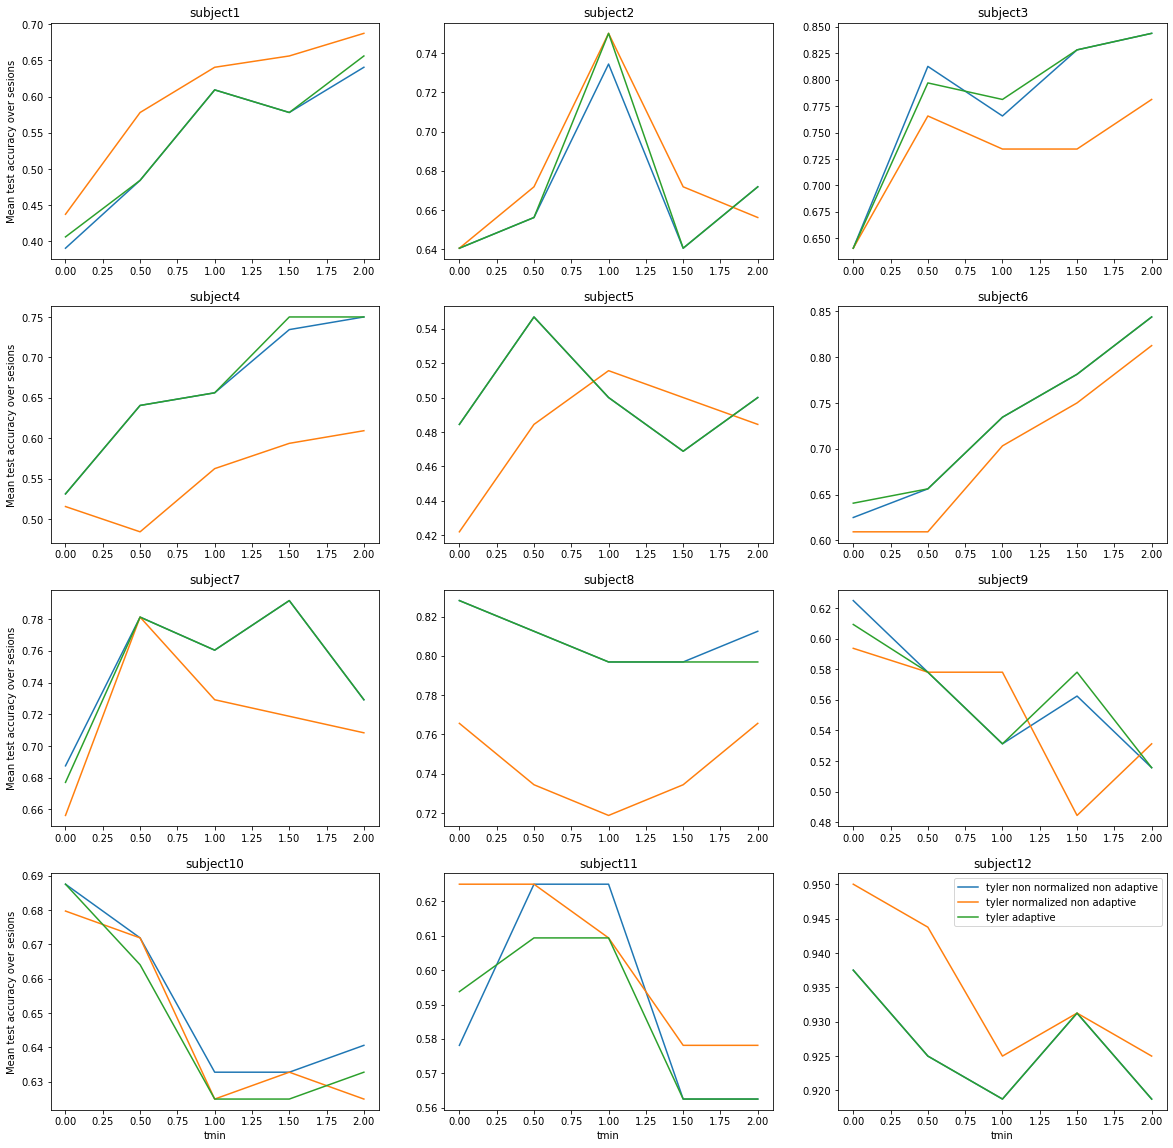

In [7]:
#plot
df = pd.DataFrame(results)
estimators = ["tyler non normalized non adaptive","tyler normalized non adaptive","tyler adaptive"]
s = len(tmins)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flatten()
all_subjects = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(tmins))]
        all_subjects[(i,k)] = y
        axs[i].plot(tmins,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("tmin")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()

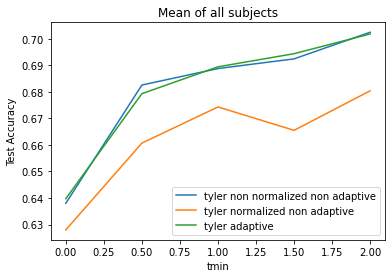

In [8]:
mean_acc = [[all_subjects[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(tmins,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("tmin")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

#### 2. Impact of train proportion

In [28]:
results1 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 2
nb_trains = 0
train_props = [0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]

for subject in range(len(subj_list)):
    
    print("--------------",subj_list[subject],"--------------")
    for train_prop in train_props:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="tyler non normalized non adaptive")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc1,test_acc1 = classif1.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc1,test_acc1,train_prop,"tyler non normalized non adaptive")
        
        COVS2 = Covariances(estimator="tyler normalized non adaptive")
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc2,test_acc2 = classif2.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc2,test_acc2,train_prop,"tyler normalized non adaptive")
        
        COVS3 = Covariances(estimator="tyler adaptive")
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc3,test_acc3 = classif3.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc3,test_acc3,train_prop,"tyler adaptive")

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject03 --------------
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.6

Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject08 --------------
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.7

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject10 --------------
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_r

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening r

Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  

    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]


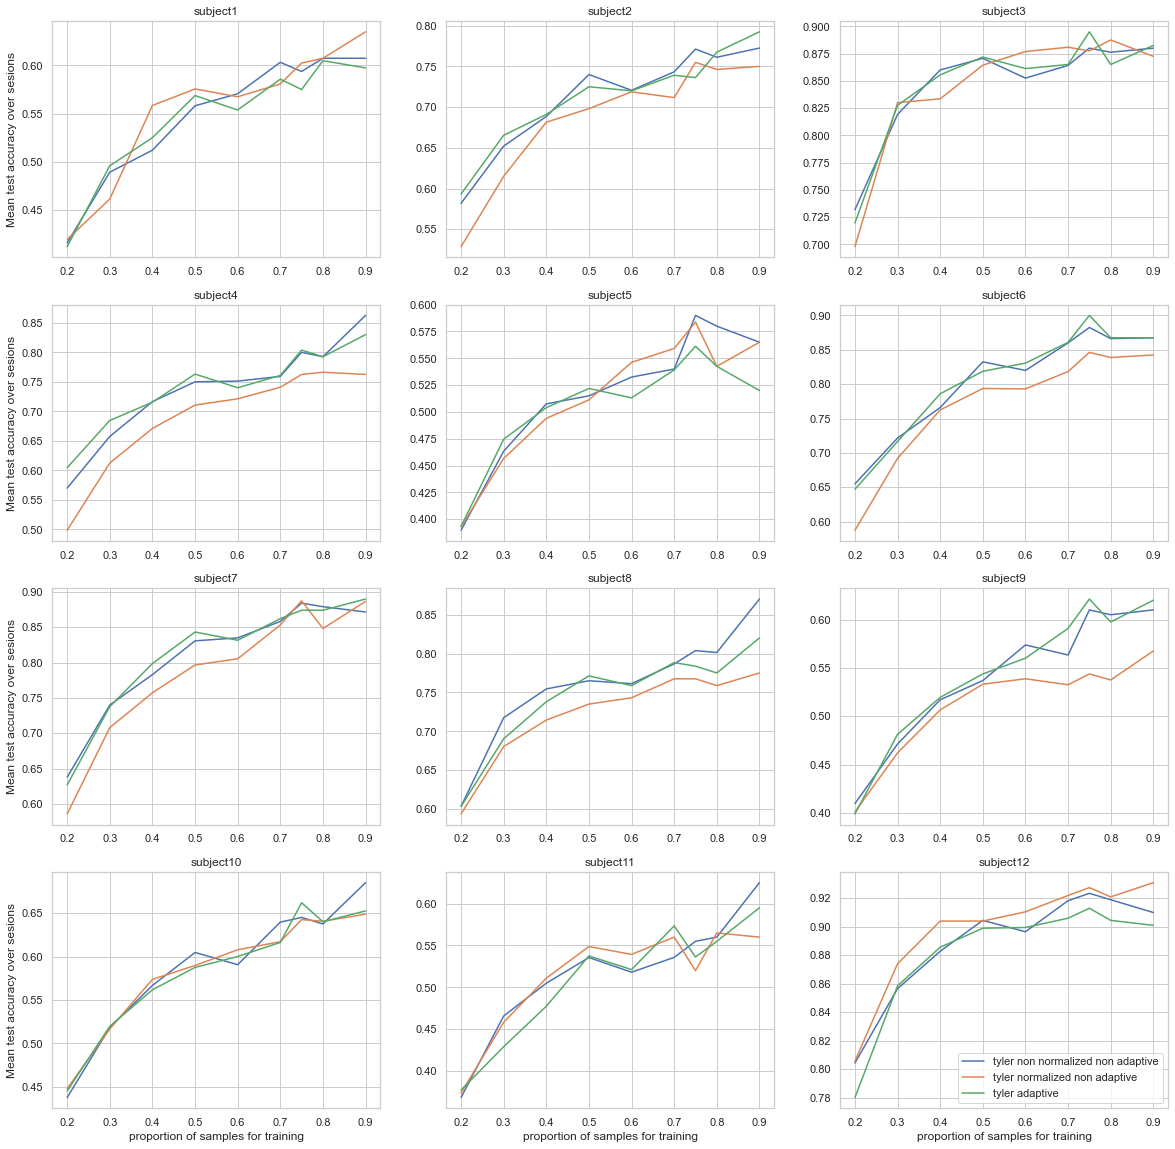

In [29]:
#plot
df1 = pd.DataFrame(results1)
estimators = ["tyler non normalized non adaptive","tyler normalized non adaptive","tyler adaptive"]
s = len(train_props)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flatten()
all_subjects1 = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df1.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(train_props))]
        all_subjects1[(i,k)] = y
        axs[i].plot(train_props,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("proportion of samples for training")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()
        

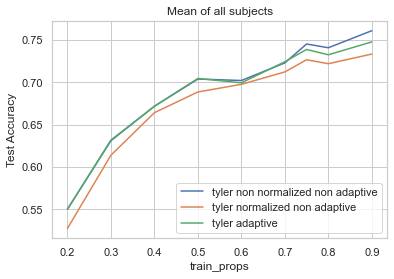

In [30]:
mean_acc = [[all_subjects1[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(train_props,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("train_props")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

#### 3. Impact of window size (tmin = 2)
##### 3.a- use 75% of the trials for training

In [14]:
results2 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 2
nb_trains = 0
train_prop =0.75
tmaxes = [3,3.25,3.5,3.75,4.25,4.5,4.75,5]

for subject in range(len(subj_list)):
    
    print("--------------",subj_list[subject],"--------------")
    for tmax in tmaxes:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="tyler non normalized non adaptive")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc1,test_acc1 = classif1.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"tyler non normalized non adaptive")
        
        COVS2 = Covariances(estimator="tyler normalized non adaptive")
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"tyler normalized non adaptive")
        
        COVS3 = Covariances(estimator="tyler adaptive")
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler adaptive")
         

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =   

Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject09 --------------
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.6

Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [

Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  

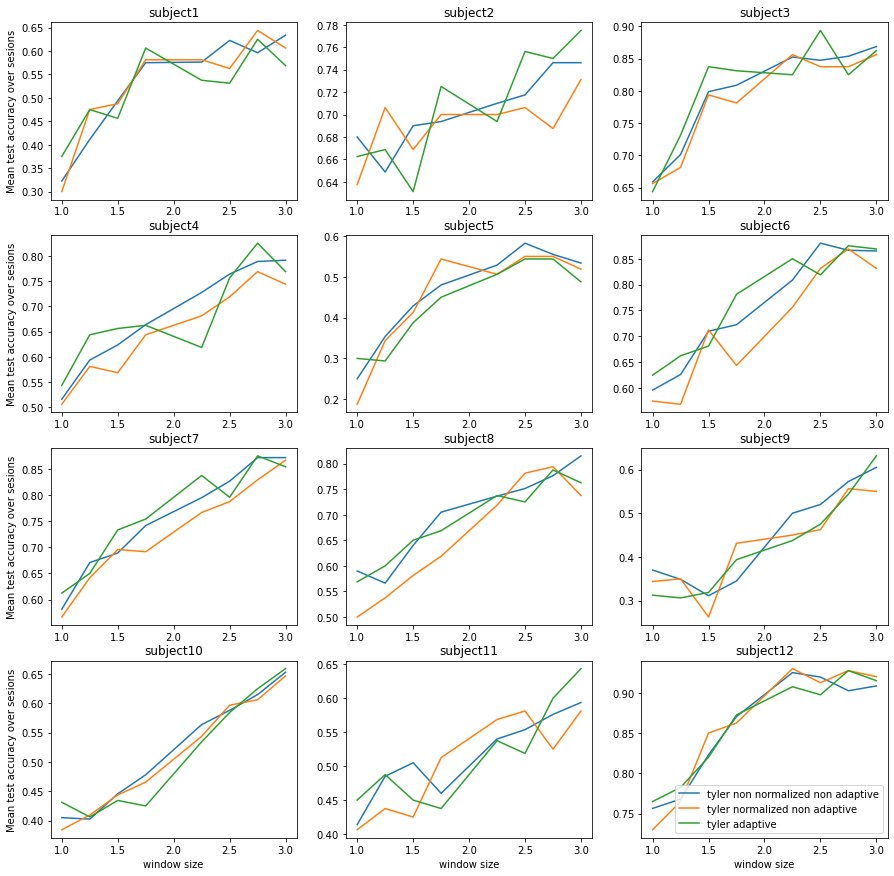

In [15]:
#plot
df2 = pd.DataFrame(results2)
estimators = ["tyler non normalized non adaptive","tyler normalized non adaptive","tyler adaptive"]
s = len(tmaxes)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(15,15))
axs = axs.flatten()
w_sizes = [tmax - tmin for tmax in tmaxes]
all_subjects2 = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df2.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(tmaxes))]
        all_subjects2[(i,k)] = y
        axs[i].plot(w_sizes,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("window size")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()
        

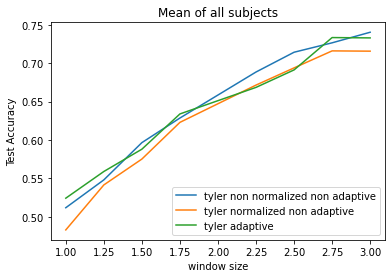

In [16]:
mean_acc = [[all_subjects2[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(w_sizes,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("window size")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

##### 3.b- use n-1 sessions for training

In [19]:
results2bis =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 2
tmaxes = [3,3.25,3.5,3.75,4.25,4.5,4.75,5]

for subject in range(len(subj_list)):
    
    print("--------------",subj_list[subject],"--------------")
    for tmax in tmaxes:
        nb_trains = len(records[subject])-1
        
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="tyler non normalized non adaptive")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes)
        train_acc1,test_acc1 = classif1.accuracies()
        results2bis= fill_dict(results2bis,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"tyler non normalized non adaptive")
        print("scm done")
        
        COVS2 = Covariances(estimator="tyler normalized non adaptive")
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results2bis = fill_dict(results2bis,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"tyler normalized non adaptive")
        
        COVS3 = Covariances(estimator="tyler adaptive")
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results2bis = fill_dict(results2bis,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler adaptive")
         

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Even

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events foun

32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events foun

32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events foun

Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
-------------- subject09 --------------
Opening raw data file ssvep_exo/subject09/

    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 755

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
-------------- subject12 --------------
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ..

Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data fi

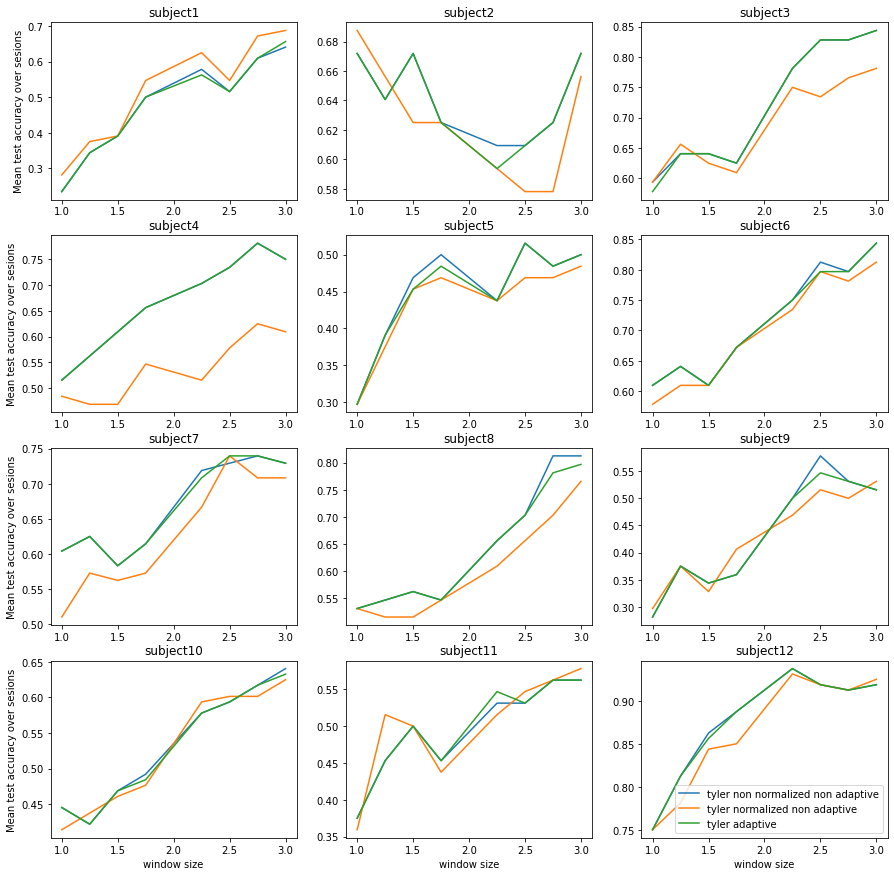

In [21]:
#plot
df2bis = pd.DataFrame(results2bis)
estimators = ["tyler non normalized non adaptive","tyler normalized non adaptive","tyler adaptive"]
s = len(tmaxes)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(15,15))
axs = axs.flatten()
w_sizes = [tmax - tmin for tmax in tmaxes]
all_subjects2bis = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df2bis.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(tmaxes))]
        all_subjects2bis[(i,k)] = y
        axs[i].plot(w_sizes,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("window size")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()

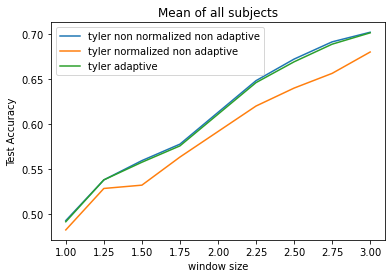

In [22]:
mean_acc = [[all_subjects2bis[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(w_sizes,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("window size")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

#### 4. Compare for tmin = 0.5 and tmax = 5

In [24]:
results0 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 0.5

for subject in range(len(subj_list)):
    
        print("--------------",subj_list[subject],"--------------")
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        nb_trains = len(records[subject])-1
        
        COVS1 = Covariances(estimator="tyler non normalized non adaptive")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes)
        train_acc1,test_acc1 = classif1.accuracies()
        results0 = fill_dict(results0,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"tyler non normalized non adaptive")
        print("tyler non normalized non adaptive done!")
        print("***** mean train score = ",round(np.mean(train_acc1),4)," +/- ",round(np.std(train_acc1),4))
        print("***** mean test score  = ",round(np.mean(test_acc1),4)," +/- ",round(np.std(test_acc1),4))
        
        COVS2 = Covariances(estimator="tyler normalized non adaptive")
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results0 = fill_dict(results0,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"tyler normalized non adaptive")
        print("tyler normalized non adaptive done!")
        print("***** mean train score = ",round(np.mean(train_acc2),4)," +/- ",round(np.std(train_acc2),4))
        print("***** mean test score  = ",round(np.mean(test_acc2),4)," +/- ",round(np.std(test_acc2),4))
        

        COVS3 = Covariances(estimator="tyler adaptive")
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results0 = fill_dict(results0,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler adaptive")
        print("tyler adaptive done!")
        print("***** mean train score = ",round(np.mean(train_acc3),4)," +/- ",round(np.std(train_acc3),4))
        print("***** mean test score  = ",round(np.mean(test_acc3),4)," +/- ",round(np.std(test_acc3),4))
        

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
tyler non normalized non adaptive done!
***** mean train score =  1.0  +/-  0.0
***** mean test score  =  0.6562  +/-  0.0312
tyler normalized non adaptive done!
***** mean train score =  1.0  +/-  0.0
***** mean test score  =  0.7812  +/-  0.0938
tyler adaptive done!
***** mean train score =  1.0  +/-  0.0
***** mean test score  =  0.6562  +/-  0.0312
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not f

-------------- subject10 --------------
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: 

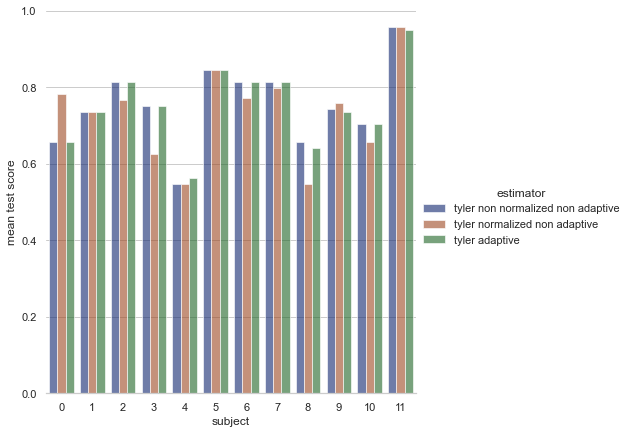

In [25]:
sns.set_theme(style="whitegrid")

df0 = pd.DataFrame(results0)

g = sns.catplot(
    data=df0, kind="bar",
    x="subject", y="mean test score", hue="estimator",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)


In [27]:
print("Means over subjects for each estimators")
for k in range(len(estimators)):
    moy = 0
    for i in range(len(subj_list)):
        moy += df0.loc[k + len(estimators)*i].at['mean test score']/len(subj_list)
    print(estimators[k]," = ", moy) 

Means over subjects for each estimators
tyler non normalized non adaptive  =  0.7522135416666667
tyler normalized non adaptive  =  0.7318142361111111
tyler adaptive  =  0.7510416666666666
